In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

torch.manual_seed(N_SEED)

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
def device():
    if torch.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [4]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="orange", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1"),
        vmax=100,
        vmin=0,
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Quality  Check Dataset

In [5]:
dataset = pd.read_csv("../data/QC.csv")

### EDA

In [6]:
dataset[:TOP_K]

,Voltage,Defect
0,1.10,0
1,1.90,0
2,2.00,0
3,2.30,0
4,2.91,0


In [7]:
dataset.describe()

,Voltage,Defect
count,52.000000,52.000000
mean,5.702308,0.403846
std,2.465469,0.495454
min,1.100000,0.000000
25%,3.600000,0.000000
50%,5.375000,0.000000
75%,7.227500,1.000000
max,12.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  52 non-null     float64
 1   Defect   52 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 964.0 bytes


In [9]:
X_df = dataset.drop(columns=["Defect"], axis=1)
y_df = dataset["Defect"]
X = np.array(X_df)
y = np.array(y_df)

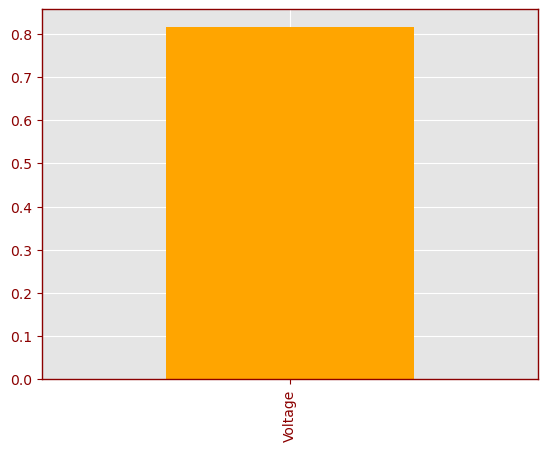

In [10]:
show_corr(X_df, y_df)

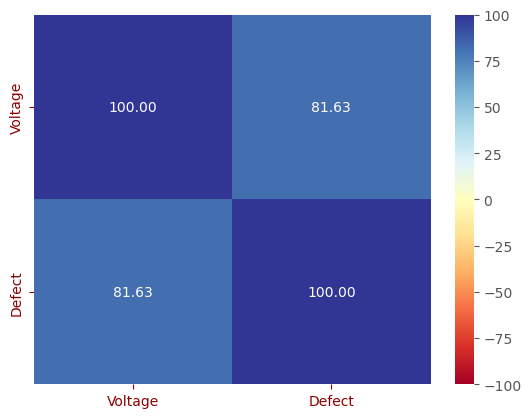

In [11]:
show_corr_heatmap(dataset)

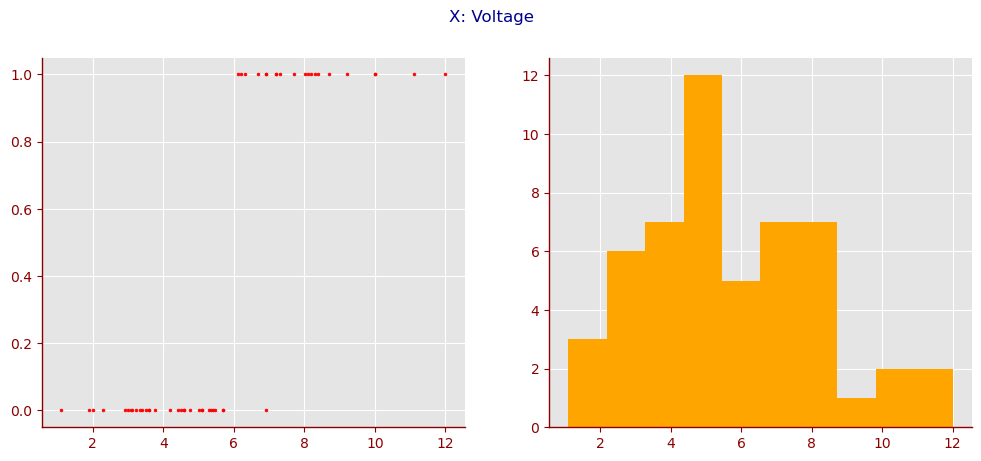

In [12]:
plot_features(X_df, y_df)

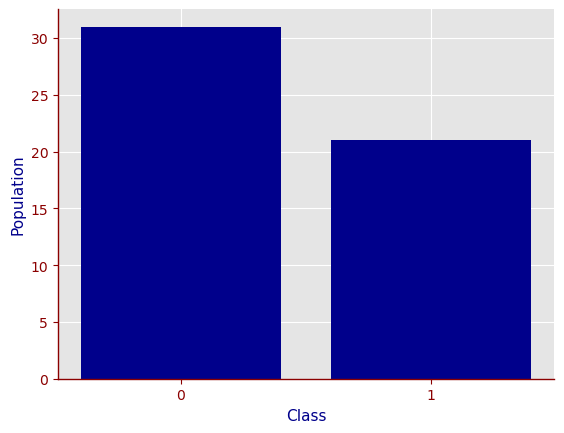

In [13]:
plot_class_dist(y_df)

In [14]:
scaler = MinMaxScaler()  
X_ANN = scaler.fit_transform(X)
y_ANN = y.reshape(-1, 1)

In [15]:
X_ANN = torch.as_tensor(X_ANN, dtype=torch.float32).to(device())
y_ANN = torch.as_tensor(y_ANN, dtype=torch.float32).to(device())

X_train, X_test, y_train, y_test = train_test_split(
    X_ANN,
    y_ANN,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

In [16]:
INPUT_SIZE = 1
HIDDEN_SIZE1 = 3
OUTPUT_SIZE = 1
LR = 0.1
NO_EPOCHS = 1000
STEPS = 100
BATCH_SIZE = 4

In [17]:
class Data(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._n_samples = len(self._x)

    def __getitem__(self, index):
        return self._x[index], self._y[index]

    def __len__(self):
        return self._n_samples


class ClassifierNN(torch.nn.Module):
    def __init__(self, input, hidden1, output):
        super(ClassifierNN, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=input, out_features=hidden1)
        self.layer2 = torch.nn.Linear(in_features=hidden1, out_features=output)
        self.activation = torch.nn.ReLU()


    def forward(self, x):
        out = self.layer1(x)
        out = self.activation(out)
        out = self.layer2(out)
        return out

In [18]:
def fit(model, data_loader, epochs, learning_rate=0.01, verbose=0, step=1):
    if verbose:
        print("---START---")
    loss = torch.nn.Module
    loss_fn = torch.nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,)
    for epoch in range(epochs):
        for _X, _y in data_loader:
            output = model(_X)
            loss = loss_fn(output, _y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch + 1) % step == 0 and verbose:
            print(f">>> Epoch: {epoch + 1}/{epochs}, loss={loss.item():.5f}")
    if verbose:
        print(f"Completed, loss={loss.item():.5f}")
        print("---END---")
    return model


def predict(model, x):
    return torch.sigmoid(model(x))


def predict_np(model, x):
    x_ts = torch.as_tensor(x, dtype=torch.float32).to(device())
    out = torch.sigmoid(model(x_ts))
    return out.squeeze().cpu().detach().numpy()

In [19]:
data = Data(x=X_train, y=y_train)
data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=BATCH_SIZE, shuffle=True)

In [20]:
model_ANN = ClassifierNN(
    input=INPUT_SIZE,
    hidden1=HIDDEN_SIZE1,
    output=OUTPUT_SIZE
).to(device=device())

model_ANN = fit(
    model=model_ANN,
    data_loader=data_loader,
    epochs=NO_EPOCHS,
    learning_rate=LR,
    verbose=1,
    step=STEPS
)

---START---
>>> Epoch: 100/1000, loss=1.50467
>>> Epoch: 200/1000, loss=0.01413
>>> Epoch: 300/1000, loss=0.00889
>>> Epoch: 400/1000, loss=0.00642
>>> Epoch: 500/1000, loss=0.01375
>>> Epoch: 600/1000, loss=0.00947
>>> Epoch: 700/1000, loss=0.12280
>>> Epoch: 800/1000, loss=0.00331
>>> Epoch: 900/1000, loss=0.00309
>>> Epoch: 1000/1000, loss=0.00277
Completed, loss=0.00277
---END---


In [21]:
y_proba_ones = predict(model_ANN, X_test)

In [22]:
y_pred = y_proba_ones.round()
y_pred_np = y_pred.cpu().detach().numpy()
y_test_np = y_test.squeeze().cpu().detach().numpy()

In [23]:
ones = np.ones(len(y_proba_ones))
y_proba_ones_np = y_proba_ones.cpu().detach().numpy()
y_proba_zeros_np = ones.reshape(-1, 1) - y_proba_ones_np
y_proba_zeros_np
y_proba_np = np.concatenate((y_proba_zeros_np, y_proba_ones_np), 1)*100

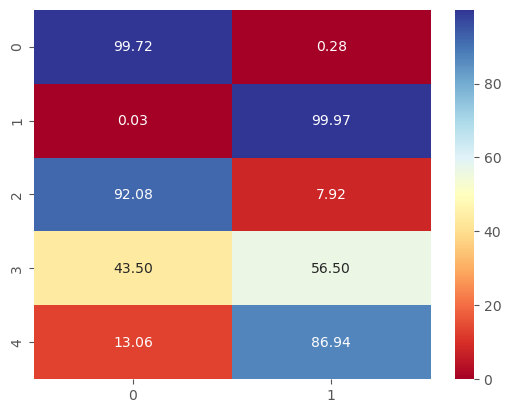

In [24]:
sns.heatmap(y_proba_np[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

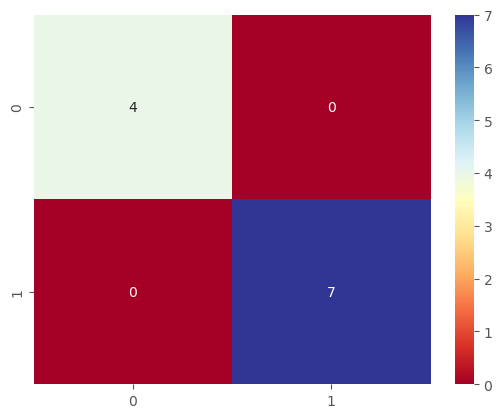

In [25]:
cm_ANN = metrics.confusion_matrix(y_true=y_test_np, y_pred=y_pred_np)
sns.heatmap(cm_ANN, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

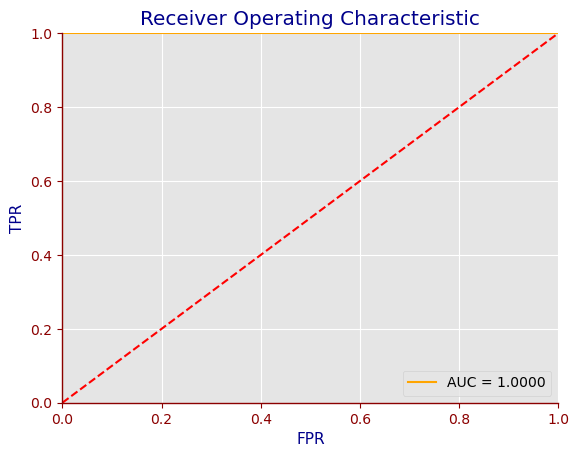

In [26]:
fpr_ANN, tpr_ANN, _ = metrics.roc_curve(y_test_np, y_proba_np[:, 1])
roc_auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
plot_roc(fpr_ANN, tpr_ANN, roc_auc_ANN)

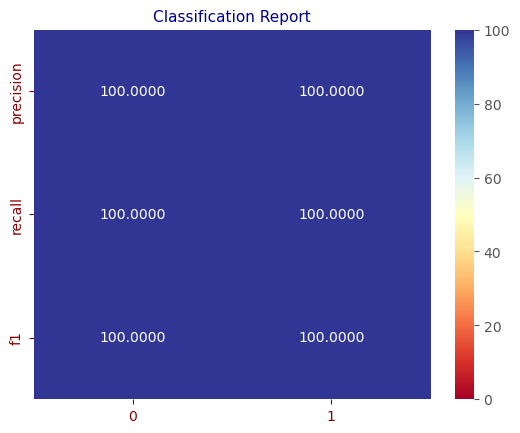

In [27]:
plot_classification(y_true=y_test_np, y_pred=y_pred_np)

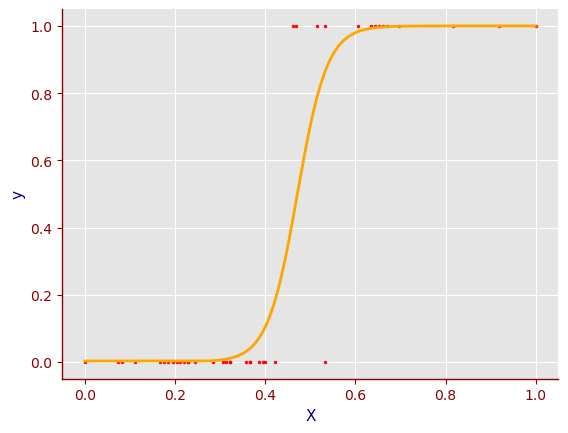

In [28]:
X_gradient_np = (np.arange(1000)*0.001).reshape(-1, 1)
X_train_np =  X_train.cpu().detach().numpy()
y_train_np = y_train.cpu().detach().numpy()
y_curve_np =  predict_np(model_ANN, X_gradient_np)
plot_Xy2(
    X_train_np,
    y_train_np,
    X_gradient_np.reshape(-1,),
    y_curve_np,
)

In [29]:
metrics.accuracy_score(y_true=y_test_np, y_pred=y_pred_np)

1.0